In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#зададим параметры
y = np.random.normal(size=30).reshape(30, 1)
x = np.array(range(1, 31)).reshape(30, 1)
coord = np.concatenate((x, y), axis=1)

<Axes: >

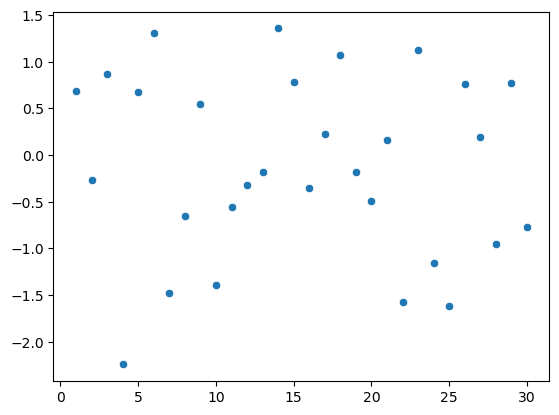

In [3]:
#построим диаграмму рассеяния
sns.scatterplot(x=x.reshape(1, 30)[0], y=y.reshape(1, 30)[0])

In [6]:
#зададим число кластеров
k = 4

#реализуем метод в цикле
centroids = []
for i in range(k):
    centroids.append(coord[random.randrange(coord.shape[0])])

while True:
    cluster = []
    for i in range(coord.shape[0]):
        d = {}
        for j in range(k):
            a = ((coord[i][0] - centroids[j][0]) ** 2 + (coord[i][1] - centroids[j][1])) ** 0.5
            d[a] = j
            c = d[min(d)]
        cluster.append(c)
    df = pd.DataFrame({'x': coord[:, 0], 'y': coord[:, 1], 'cluster': cluster})
    
    new_centroids = []
    for i in range(k):
        data = df[df['cluster'] == i]
        new_centroids.append(np.array([data['x'].mean(), data['y'].mean()]))
    
    new_cluster = []
    for i in range(coord.shape[0]):
        d = {}
        for j in range(k):
            a = ((coord[i][0] - new_centroids[j][0]) ** 2 + (coord[i][1] - new_centroids[j][1])) ** 0.5
            d[a] = j
            c = d[min(d)]
        new_cluster.append(c)
    
    if cluster == new_cluster:
        break
    
    centroids = new_centroids

C:\Users\mrrr_\AppData\Local\Temp\ipykernel_8728\1283621894.py:14: RuntimeWarning: invalid value encountered in scalar power
  a = ((coord[i][0] - centroids[j][0]) ** 2 + (coord[i][1] - centroids[j][1])) ** 0.5
C:\Users\mrrr_\AppData\Local\Temp\ipykernel_8728\1283621894.py:29: RuntimeWarning: invalid value encountered in scalar power
  a = ((coord[i][0] - new_centroids[j][0]) ** 2 + (coord[i][1] - new_centroids[j][1])) ** 0.5


In [7]:
#запишем кластеры в датасете
new_df = pd.DataFrame({'x': coord[:, 0], 'y': coord[:, 1], 'cluster': cluster})
new_df

,x,y,cluster
0,1.0,0.685035,3
1,2.0,-0.268475,3
2,3.0,0.864414,3
3,4.0,-2.243637,2
4,5.0,0.679520,3
5,6.0,1.313242,3
6,7.0,-1.477987,3
7,8.0,-0.653441,2
8,9.0,0.544532,2
9,10.0,-1.388198,3


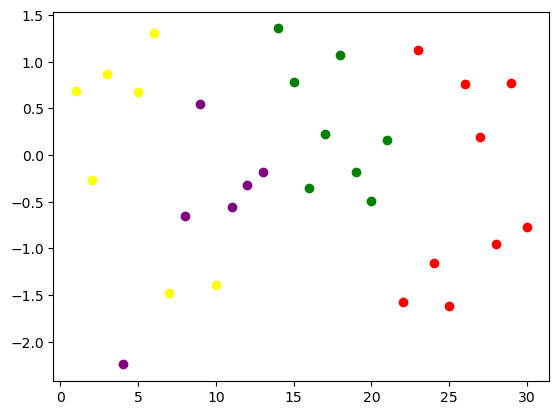

In [9]:
#зададим цвета для кластеров
colors = ['red', 'green',  'purple', 'yellow']

#раскрасим диаграмму рассеяния
for i in range(k):
    plt.scatter(data=new_df[new_df['cluster'] == i], x='x', y='y', color=colors[i])